<a href="https://colab.research.google.com/github/JoaquimTarin/Thesis-ML-Statistical-Physics/blob/main/KerasSupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was created by following the instructions in https://www.tensorflow.org/tutorials/keras/classification


In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(test_labels.shape) # Using the shape function doesn't make much sense, since the labels are a single numerical value

(60000, 28, 28)
60000
(10000, 28, 28)
(10000,)


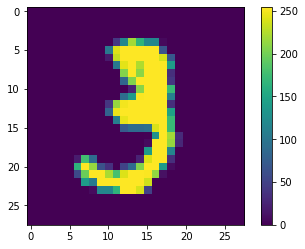

In [ ]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255 # Each pixel in the data set is encoded with a numerical number from 0 to 255
test_images = test_images/255   # Here we rescale them to a float from 0 to 1

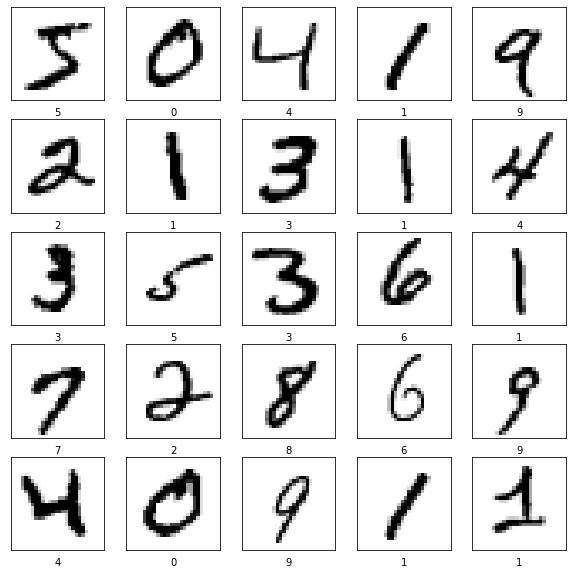

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2582 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1107 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0567 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0340 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0271 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.014

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0915 - accuracy: 0.9769 - 919ms/epoch - 3ms/step

Test accuracy: 0.9768999814987183


In [ ]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions[0])

[4.5598043e-07 1.3982819e-09 2.7917821e-07 3.3894368e-04 5.1583767e-17
 5.3173915e-10 6.8614539e-17 9.9965471e-01 5.5326177e-07 5.0907825e-06]


Our model predicts that the digit in image number 100 is 6 . It actually is 6


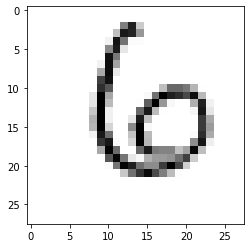

In [ ]:
a = 100
print('Our model predicts that the digit in image number', a, 'is', np.argmax(predictions[a]), '. It actually is', test_labels[a])

plt.figure()
plt.imshow(test_images[a], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label],
                                     color=color))
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

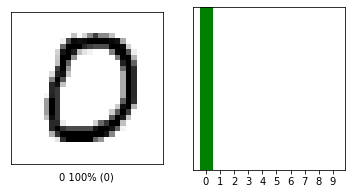

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

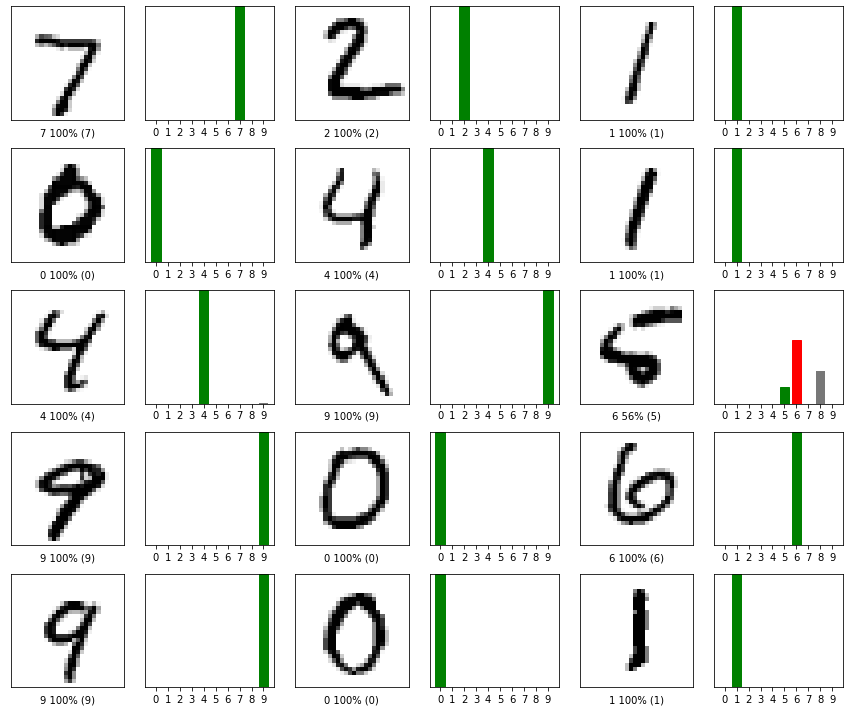

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[7.7130986e-09 5.2853947e-11 4.3918853e-08 2.0482714e-05 7.6040102e-13
  1.9987469e-10 2.7712507e-14 9.9996722e-01 2.3590985e-08 1.2280577e-05]]


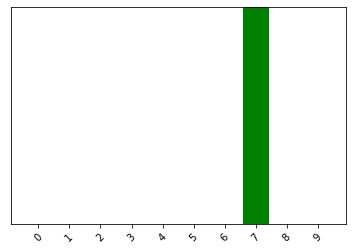

In [ ]:
plot_value_array(0, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

7